### Demonstration of using the NABatR library to query and display GRTS cells.

In [1]:
library(nabatr)
library(sp)

In [2]:
colorado = get_grts_data('conus', query="state_n_1='Colorado'")

OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\talbertc\AppData\Local\Temp\1\RtmpWCaKtd\file82a87cf17fa3", layer: "conus_mastersample_10km_attributed"
with 2698 features
It has 43 fields


#### Let's take a look at the amount of US Forest Service land in each GRTS cell in Colorado

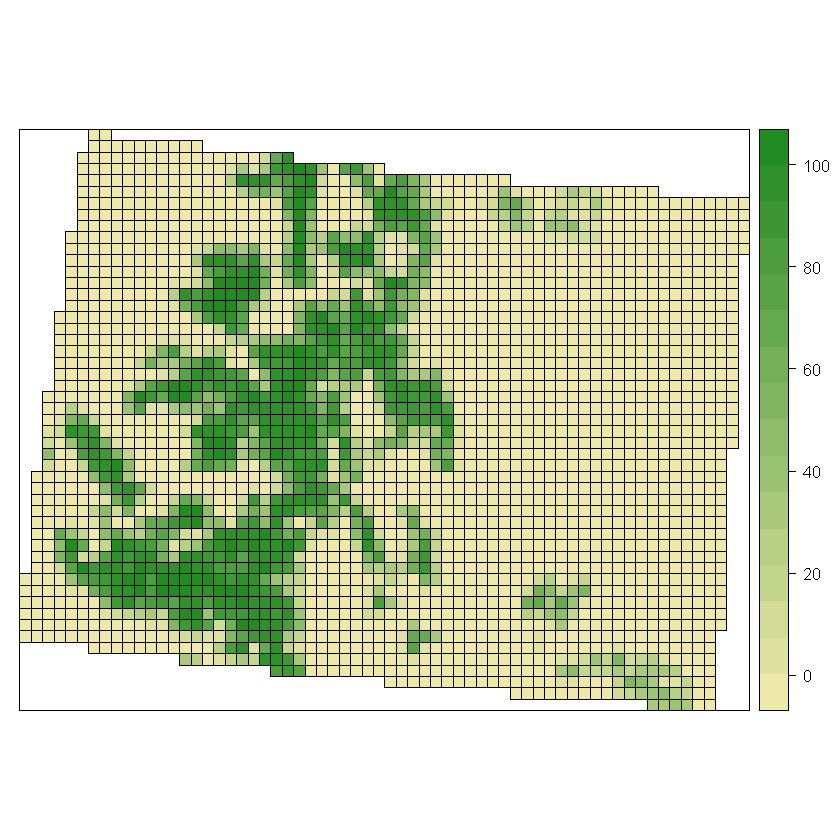

In [3]:
ylgn <- colorRampPalette(c('palegoldenrod', 'forestgreen'))

spplot(colorado, zcol='own_USFS', col.regions = ylgn(100))

## Where do the high priority cells (top 5%) overlap these US Forest Service lands? 

In [4]:
colorado_priority = get_grts_data('Conus', query="state_n_1='Colorado'", only_priority = T)

OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\talbertc\AppData\Local\Temp\1\RtmpWCaKtd\file82a812ff6f90", layer: "conus_mastersample_10km_attributed"
with 135 features
It has 43 fields


## If you want to query a subset smaller than the entire frame (all the cells in a single county) or a cutoff different than 5% run the following selection
### *Note these priority cells can vary slightly different than the national selection, especially at smaller extents.*

In [5]:
cutoff_pcnt = 3

usfs_cells = colorado[colorado$own_USFS >= 50, ]

usfs_priority_cells = usfs_cells[usfs_cells$GRTS_ID <= quantile(colorado$GRTS_ID, prob=cutoff_pcnt/100),]

### Map these these two high priority cells

In [6]:
library(ggplot2)
library(ggmap)
library(maps)
library(mapdata)

In [7]:
states <- map_data("state")
counties <- map_data("county")
co_df <- subset(states, region == "colorado")
co_county <- subset(counties, region == "colorado")

In [8]:
co_base <- ggplot(data = co_df, mapping = aes(x = long, y = lat, group = group)) + 
  coord_fixed(1.3) + 
  geom_polygon(color = "black", fill = "gray")

Regions defined for each Polygons
Regions defined for each Polygons
Regions defined for each Polygons


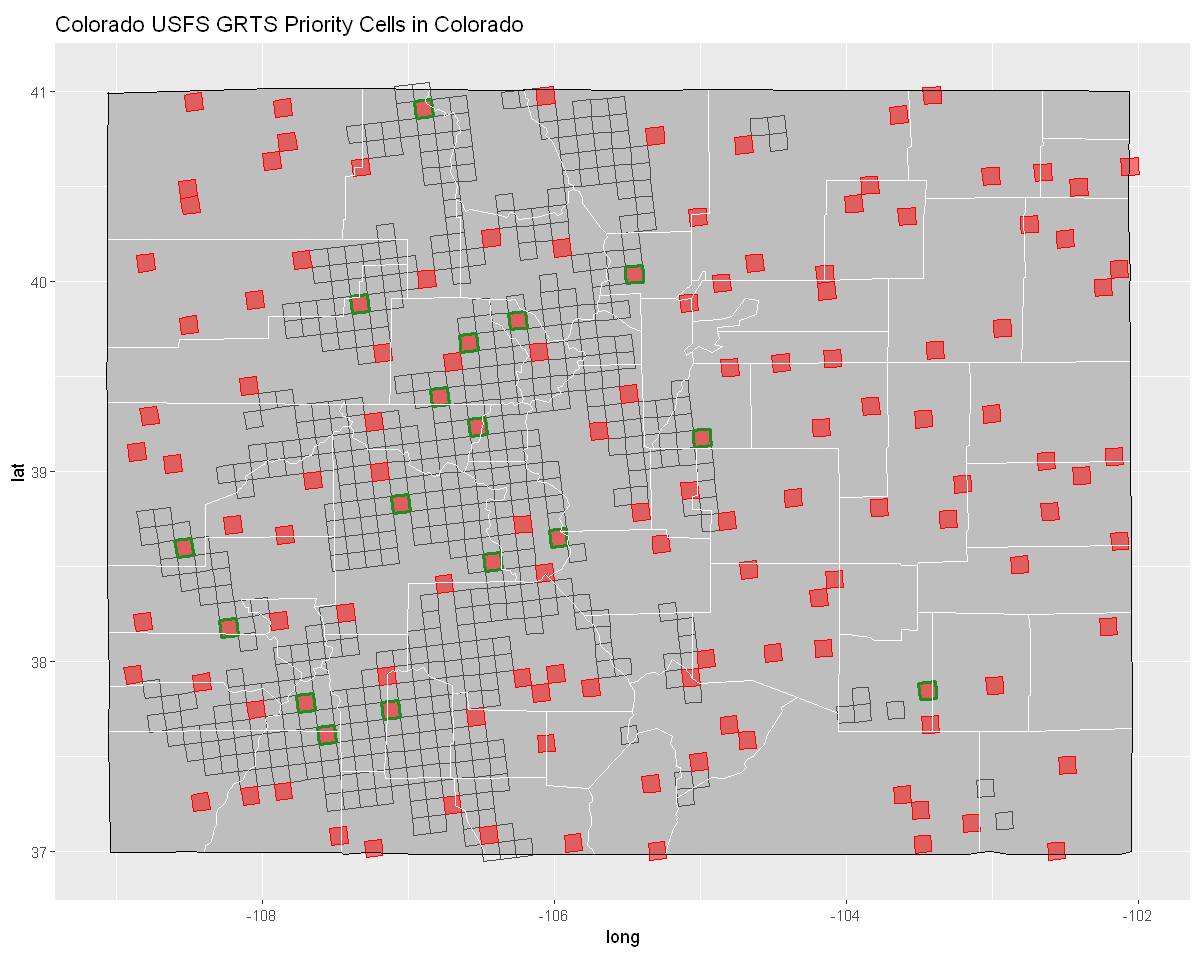

In [9]:
library(repr)
options(repr.plot.width=10, repr.plot.height=8)

co_base +
    geom_polygon(data=spTransform(usfs_cells, CRS("+proj=longlat +datum=WGS84")), color='grey30', fill='red', alpha=0.0) +
    geom_polygon(data=spTransform(colorado_priority, CRS("+proj=longlat +datum=WGS84")), color='red', fill='red', alpha=0.5) + 
    geom_polygon(data=spTransform(usfs_priority_cells, CRS("+proj=longlat +datum=WGS84")), color='forestgreen', fill='green', alpha=0.0, size=1) + 
    geom_polygon(data = co_county, fill = NA, color = "white") +
    geom_polygon(color = "black", fill = NA) +
    ggtitle("Colorado USFS GRTS Priority Cells in Colorado")